In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the CSV file for volume of production
production_data = pd.read_csv('dataset/Production_volume.csv')

# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()

production_data = pd.melt(production_data, 
                        id_vars=['Croptype', 'Province'],   
                        var_name='Quarter',  
                        value_name='Production') 

# extract the 'Quarter' and 'Year' from the 'Quarter' column
production_data[['Quarter', 'Year']] = production_data['Quarter'].str.extract(r'(Quarter \d) (\d{4})')

In [3]:
production_data.head(10)

,Croptype,Province,Quarter,Production,Year
0,Irrigated Palay,Aklan,Quarter 1,19309,1987
1,Irrigated Palay,Antique,Quarter 1,28275,1987
2,Irrigated Palay,Capiz,Quarter 1,18540,1987
3,Irrigated Palay,Guimaras,Quarter 1,0,1987
4,Irrigated Palay,Iloilo,Quarter 1,58187,1987
5,Rainfed Palay,Aklan,Quarter 1,8130,1987
6,Rainfed Palay,Antique,Quarter 1,3890,1987
7,Rainfed Palay,Capiz,Quarter 1,78750,1987
8,Rainfed Palay,Guimaras,Quarter 1,0,1987
9,Rainfed Palay,Iloilo,Quarter 1,130852,1987


In [4]:
# load the CSV file for area harvested
area_data = pd.read_csv('dataset/Area_harvested.csv')

# fill values for croptype
area_data['Croptype'] = area_data['Croptype'].ffill()

area_data = pd.melt(area_data, 
                        id_vars=['Croptype', 'Province'],   
                        var_name='Quarter',  
                        value_name='Area') 

# extract the 'Quarter' and 'Year' from the 'Quarter' column
area_data[['Quarter', 'Year']] = area_data['Quarter'].str.extract(r'(Quarter \d) (\d{4})')

In [5]:
area_data.head(10)

,Croptype,Province,Quarter,Area,Year
0,Irrigated Palay,Aklan,Quarter 1,6130,1987
1,Irrigated Palay,Antique,Quarter 1,9030,1987
2,Irrigated Palay,Capiz,Quarter 1,6300,1987
3,Irrigated Palay,Guimaras,Quarter 1,0,1987
4,Irrigated Palay,Iloilo,Quarter 1,21270,1987
5,Rainfed Palay,Aklan,Quarter 1,4890,1987
6,Rainfed Palay,Antique,Quarter 1,2590,1987
7,Rainfed Palay,Capiz,Quarter 1,31240,1987
8,Rainfed Palay,Guimaras,Quarter 1,0,1987
9,Rainfed Palay,Iloilo,Quarter 1,60130,1987


In [11]:
yield_data = pd.merge(area_data, production_data, on=['Croptype', 'Province', 'Year', 'Quarter' ], how='left')

In [12]:
yield_data.head(10)

,Croptype,Province,Quarter,Area,Year,Production
0,Irrigated Palay,Aklan,Quarter 1,6130,1987,19309
1,Irrigated Palay,Antique,Quarter 1,9030,1987,28275
2,Irrigated Palay,Capiz,Quarter 1,6300,1987,18540
3,Irrigated Palay,Guimaras,Quarter 1,0,1987,0
4,Irrigated Palay,Iloilo,Quarter 1,21270,1987,58187
5,Rainfed Palay,Aklan,Quarter 1,4890,1987,8130
6,Rainfed Palay,Antique,Quarter 1,2590,1987,3890
7,Rainfed Palay,Capiz,Quarter 1,31240,1987,78750
8,Rainfed Palay,Guimaras,Quarter 1,0,1987,0
9,Rainfed Palay,Iloilo,Quarter 1,60130,1987,130852


In [13]:
# replace zeroes with NaN for valid imputation (only if you think they are missing data)
yield_data['Production'] = yield_data['Production'].replace(0, pd.NA)
yield_data['Area'] = yield_data['Area'].replace(0, pd.NA)

# Convert columns to numeric (force errors to NaN)
yield_data['Production'] = pd.to_numeric(yield_data['Production'], errors='coerce')
yield_data['Area'] = pd.to_numeric(yield_data['Area'], errors='coerce')

yield_data.head(5)

,Croptype,Province,Quarter,Area,Year,Production
0,Irrigated Palay,Aklan,Quarter 1,6130.0,1987,19309.0
1,Irrigated Palay,Antique,Quarter 1,9030.0,1987,28275.0
2,Irrigated Palay,Capiz,Quarter 1,6300.0,1987,18540.0
3,Irrigated Palay,Guimaras,Quarter 1,NaN,1987,NaN
4,Irrigated Palay,Iloilo,Quarter 1,21270.0,1987,58187.0


In [14]:
# calculate Yield after handling zeroes
yield_data['Yield'] = yield_data['Production'] / yield_data['Area']

# use linear interpolation to handle missing values
yield_data['Yield'] = yield_data['Yield'].interpolate(method='linear')

In [15]:
yield_data.head(5)

,Croptype,Province,Quarter,Area,Year,Production,Yield
0,Irrigated Palay,Aklan,Quarter 1,6130.0,1987,19309.0,3.149918
1,Irrigated Palay,Antique,Quarter 1,9030.0,1987,28275.0,3.131229
2,Irrigated Palay,Capiz,Quarter 1,6300.0,1987,18540.0,2.942857
3,Irrigated Palay,Guimaras,Quarter 1,NaN,1987,NaN,2.839247
4,Irrigated Palay,Iloilo,Quarter 1,21270.0,1987,58187.0,2.735637


In [25]:
# yield_data.to_csv("dataset/preprocessed.csv", index=False)

In [27]:
# descriptive statistics
desc_stats = yield_data.describe()

print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,Area,Production,Yield
count,4171.000000,4171.000000,4620.000000
mean,9131.738969,27152.526195,2.293601
std,16431.008336,51693.610223,1.132446
min,1.000000,0.700000,0.152174
25%,247.500000,343.500000,1.252632
50%,2590.000000,5899.000000,2.434107
75%,9289.000000,27880.500000,3.164825
max,115071.000000,411113.000000,5.913212


In [26]:
aggregated_data = yield_data.groupby(['Croptype', 'Province', 'Quarter', 'Year']).agg(
    total_production=('Production', 'sum'),
    total_area=('Area', 'sum'),
    mean_yield=('Yield', 'mean')
).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head(10)

,Croptype,Province,Quarter,Year,total_production,total_area,mean_yield
0,Corn,Aklan,Quarter 1,1987,47.0,80.0,0.587500
1,Corn,Aklan,Quarter 1,1988,32.0,70.0,0.457143
2,Corn,Aklan,Quarter 1,1989,0.0,0.0,0.316030
3,Corn,Aklan,Quarter 1,1990,30.0,50.0,0.600000
4,Corn,Aklan,Quarter 1,1991,9.0,30.0,0.300000
5,Corn,Aklan,Quarter 1,1992,12.0,40.0,0.300000
6,Corn,Aklan,Quarter 1,1993,100.0,200.0,0.500000
7,Corn,Aklan,Quarter 1,1994,0.0,0.0,0.917563
8,Corn,Aklan,Quarter 1,1995,222.0,370.0,0.600000
9,Corn,Aklan,Quarter 1,1996,212.0,340.0,0.623529


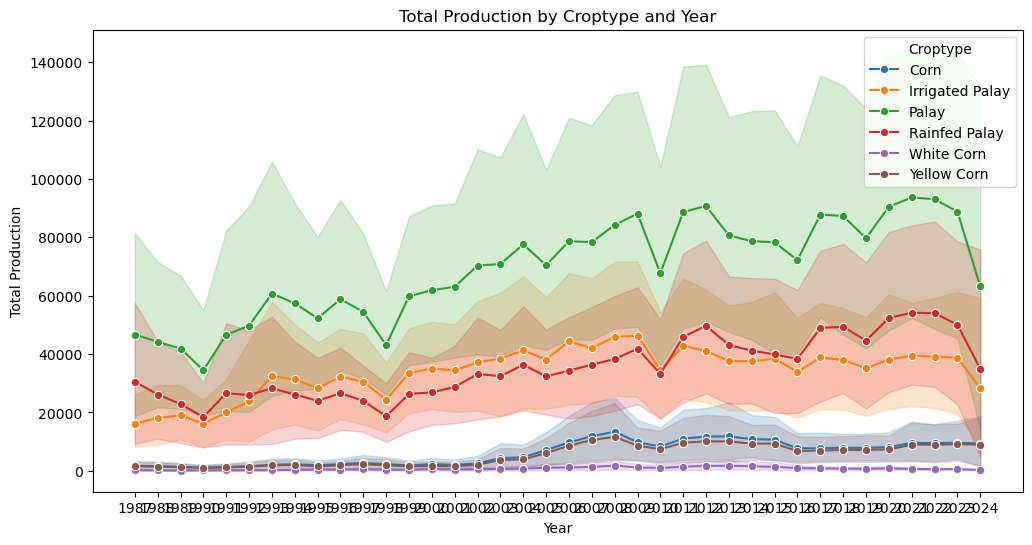

In [28]:
plt.figure(figsize=(12, 6))

# Cceate a line plot of total production over time for each Croptype
sns.lineplot(data=aggregated_data, x='Year', y='total_production', hue='Croptype', marker='o')

plt.title('Total Production by Croptype and Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend(title='Croptype')
plt.show()

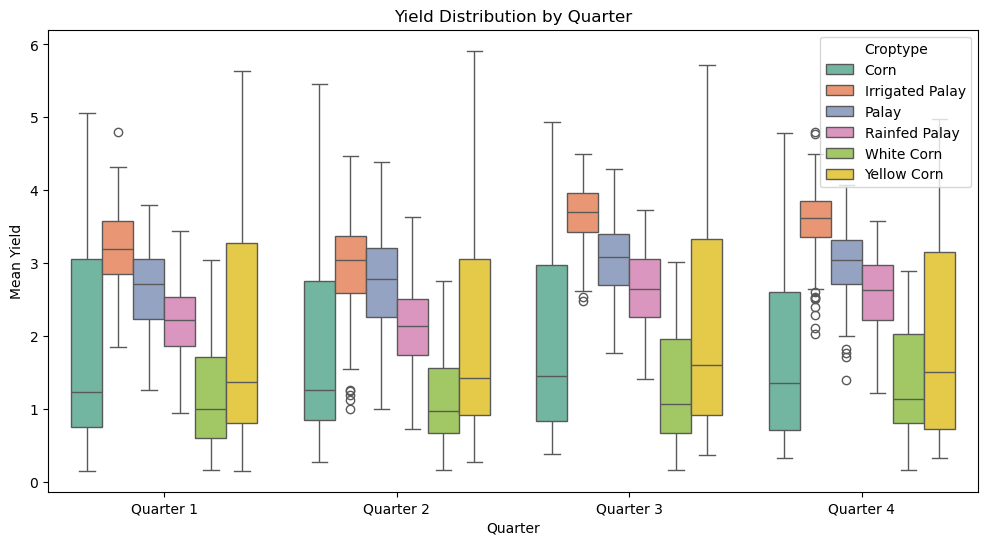

In [29]:
plt.figure(figsize=(12, 6))

# create a boxplot to show the distribution of Yield by Quarter
sns.boxplot(data=aggregated_data, x='Quarter', y='mean_yield', hue='Croptype', palette='Set2')

plt.title('Yield Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Yield')
plt.show()